Part 1: Data and Representation

In [7]:
import kaggle
import sqlite3
import json
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

In [37]:
BASE_DIR = os.path.dirname(os.path.abspath('__file__'))
filename = 'database.sqlite'
db_path = os.path.join(BASE_DIR, filename)
    
conn = sqlite3.connect(db_path)
conn.text_factory = sqlite3.OptimizedUnicode
cur = conn.cursor()

comment = pd.read_sql_query("SELECT body FROM May2015 LIMIT 800", conn)
# comment = pd.read_sql_query("SELECT body FROM May2015", conn)
print(comment.head(4))

conn.close()

print('Data uploaded')

                                                body
0                    くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな
1  gg this one's over. off to watch the NFL draft...
2  Are you really implying we return to those tim...
3  No one has a European accent either  because i...
Data uploaded


In [38]:
text = comment.body.str.cat(sep=' ')
text = text.encode('ascii', 'ignore')
text = text.decode('ascii', 'ignore')
print(text[1:40])


 gg this one's over. off to watch the 


In [39]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

maxlen = 60
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

# One-hot encoding
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Part2: Training

In [28]:
model1 = Sequential()
model1.add(SimpleRNN(100, input_shape=(maxlen, len(chars)),use_bias=True, kernel_initializer='glorot_uniform'))
model1.add(Dense(len(chars)))
model1.add(Activation('softmax'))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer)

history1 = model1.fit(x, y,
          batch_size=100, 
          epochs=100)

Epoch 1/100
10004/10004 [==============================] - 5s 546us/step - loss: 3.3373
Epoch 2/100
10004/10004 [==============================] - 5s 528us/step - loss: 3.0395
Epoch 3/100
10004/10004 [==============================] - 5s 546us/step - loss: 2.8975
Epoch 4/100
10004/10004 [==============================] - 5s 533us/step - loss: 2.7525
Epoch 5/100
10004/10004 [==============================] - 5s 509us/step - loss: 2.6483
Epoch 6/100
10004/10004 [==============================] - 5s 533us/step - loss: 2.5650
Epoch 7/100
10004/10004 [==============================] - 5s 488us/step - loss: 2.4955
Epoch 8/100
10004/10004 [==============================] - 5s 500us/step - loss: 2.4388
Epoch 9/100
10004/10004 [==============================] - 5s 521us/step - loss: 2.3850
Epoch 10/100
10004/10004 [==============================] - 5s 526us/step - loss: 2.3322
Epoch 11/100
10004/10004 [==============================] - 6s 565us/step - loss: 2.2942
Epoch 12/100
10004/10004 [====

In [47]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

generated = ''
for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_indices[char]] = 1.

    preds = model3.predict(x_pred, verbose=0)[0]
    next_index = sample(preds, 1)
    next_char = indices_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

e ters for a thon bo chust intiiges way all Bnd and bewore. Thenascerusien. Yecarme that whet bathal nist to be whe Be somersinm follo cinpsciin. Itcone tisk!? Yele the Bodneven l atkinwt so woug that a buw ledo baving Mhat Ally fart a buthr on yha asde not makine o think wor haply bot commmont tore Shes dourd on yod onte bo heleibuy teandlise to gevaide bow heamd, now suas a not a jusp. Le a Bl's


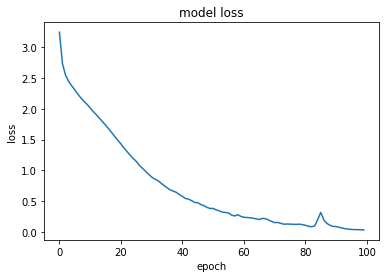

In [49]:
# Plot the loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Part3: Experiments 

In [33]:
model1a = Sequential()
model1a.add(SimpleRNN(50, input_shape=(maxlen, len(chars)),use_bias=True, kernel_initializer='glorot_uniform'))
model1a.add(Dense(len(chars)))
model1a.add(Activation('softmax'))
model1a.compile(loss='categorical_crossentropy', optimizer=optimizer)

history1a = model1a.fit(x, y,
          batch_size=100, 
          epochs=100)

Epoch 1/100
10004/10004 [==============================] - 3s 326us/step - loss: 3.2208
Epoch 2/100
10004/10004 [==============================] - 3s 288us/step - loss: 2.8733
Epoch 3/100
10004/10004 [==============================] - 3s 311us/step - loss: 2.6887
Epoch 4/100
10004/10004 [==============================] - 3s 285us/step - loss: 2.5913
Epoch 5/100
10004/10004 [==============================] - 3s 285us/step - loss: 2.5228
Epoch 6/100
10004/10004 [==============================] - 3s 280us/step - loss: 2.4726
Epoch 7/100
10004/10004 [==============================] - 2s 246us/step - loss: 2.4307
Epoch 8/100
10004/10004 [==============================] - 3s 271us/step - loss: 2.3941
Epoch 9/100
10004/10004 [==============================] - 3s 321us/step - loss: 2.3641
Epoch 10/100
10004/10004 [==============================] - 3s 330us/step - loss: 2.3368
Epoch 11/100
10004/10004 [==============================] - 3s 327us/step - loss: 2.3072
Epoch 12/100
10004/10004 [====

In [40]:
model1b = Sequential()
model1b.add(SimpleRNN(200, input_shape=(maxlen, len(chars)),use_bias=True, kernel_initializer='glorot_uniform'))
model1b.add(Dense(len(chars)))
model1b.add(Activation('softmax'))
model1b.compile(loss='categorical_crossentropy', optimizer=optimizer)

history1b = model1b.fit(x, y,
          batch_size=100, 
          epochs=100)

Epoch 1/100
4742/4742 [==============================] - 6s 1ms/step - loss: 3.4152
Epoch 2/100
4742/4742 [==============================] - 4s 903us/step - loss: 3.2589
Epoch 3/100
4742/4742 [==============================] - 5s 961us/step - loss: 3.1583
Epoch 4/100
4742/4742 [==============================] - 5s 1ms/step - loss: 3.0745
Epoch 5/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.9422
Epoch 6/100
4742/4742 [==============================] - 5s 957us/step - loss: 2.8638
Epoch 7/100
4742/4742 [==============================] - 4s 948us/step - loss: 2.7969
Epoch 8/100
4742/4742 [==============================] - 5s 955us/step - loss: 2.7563
Epoch 9/100
4742/4742 [==============================] - 5s 1ms/step - loss: 2.7004
Epoch 10/100
4742/4742 [==============================] - 4s 913us/step - loss: 2.6588
Epoch 11/100
4742/4742 [==============================] - 4s 911us/step - loss: 2.6321
Epoch 12/100
4742/4742 [==============================] - 5s

In [43]:
model2 = Sequential()
model2.add(LSTM(100, input_shape=(maxlen, len(chars))))
model2.add(Dense(len(chars)))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)

history2 = model2.fit(x, y,
          batch_size=100, 
          epochs=100)

Epoch 1/100
4742/4742 [==============================] - 7s 1ms/step - loss: 3.2757
Epoch 2/100
4742/4742 [==============================] - 7s 2ms/step - loss: 3.0427
Epoch 3/100
4742/4742 [==============================] - 7s 2ms/step - loss: 2.9241
Epoch 4/100
4742/4742 [==============================] - 7s 1ms/step - loss: 2.8106
Epoch 5/100
4742/4742 [==============================] - 8s 2ms/step - loss: 2.7217
Epoch 6/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.6540
Epoch 7/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.6054
Epoch 8/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.5654
Epoch 9/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.5375
Epoch 10/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.5103
Epoch 11/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.4839
Epoch 12/100
4742/4742 [==============================] - 6s 1ms/step - lo

In [46]:
model3 = Sequential()
model3.add(GRU(100, input_shape=(maxlen, len(chars))))
model3.add(Dense(len(chars)))
model3.add(Activation('softmax'))
model3.compile(loss='categorical_crossentropy', optimizer=optimizer)

history3 = model3.fit(x, y,
          batch_size=100, 
          epochs=100)

Epoch 1/100
4742/4742 [==============================] - 7s 2ms/step - loss: 3.2435
Epoch 2/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.7307
Epoch 3/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.5447
Epoch 4/100
4742/4742 [==============================] - 5s 1ms/step - loss: 2.4473
Epoch 5/100
4742/4742 [==============================] - 7s 1ms/step - loss: 2.3739
Epoch 6/100
4742/4742 [==============================] - 7s 1ms/step - loss: 2.3076
Epoch 7/100
4742/4742 [==============================] - 5s 1ms/step - loss: 2.2378
Epoch 8/100
4742/4742 [==============================] - 5s 1ms/step - loss: 2.1759
Epoch 9/100
4742/4742 [==============================] - 5s 1ms/step - loss: 2.1207
Epoch 10/100
4742/4742 [==============================] - 7s 1ms/step - loss: 2.0727
Epoch 11/100
4742/4742 [==============================] - 6s 1ms/step - loss: 2.0145
Epoch 12/100
4742/4742 [==============================] - 5s 1ms/step - lo